In [22]:
# Disable GPU to avoid cuDNN issues
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Install necessary packages
!pip install -q tensorflow numpy matplotlib


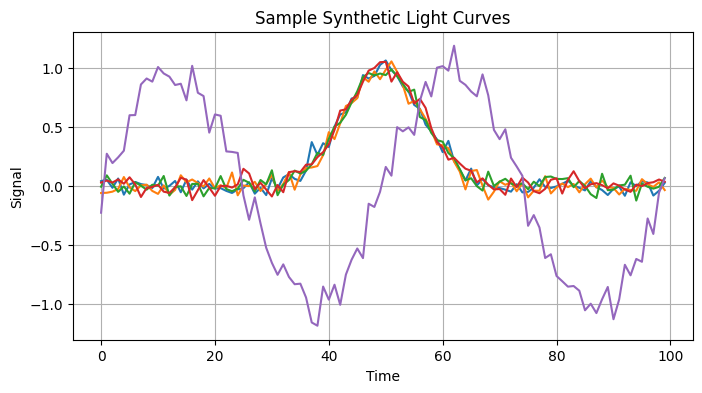

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Parameters
n_samples = 200
timesteps = 100
classes = 2

# Generate Class 0: Noisy sine wave (like Cepheid variable stars)
X0 = [np.sin(np.linspace(0, 4*np.pi, timesteps)) + np.random.normal(0, 0.1, timesteps) for _ in range(n_samples)]

# Generate Class 1: Gaussian bump (like Supernova)
X1 = [np.exp(-((np.linspace(-1, 1, timesteps))/0.2)**2) + np.random.normal(0, 0.05, timesteps) for _ in range(n_samples)]

X = np.array(X0 + X1)
y = np.array([0]*n_samples + [1]*n_samples)

# Shuffle dataset
idx = np.random.permutation(len(y))
X, y = X[idx], y[idx]

# Visualize few samples
plt.figure(figsize=(8, 4))
plt.plot(X[:5].T)
plt.title("Sample Synthetic Light Curves")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
plt.show()

# Reshape for CNN input (samples, timesteps, channels)
X = X[..., np.newaxis]  # shape becomes (400, 100, 1)


In [24]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(timesteps, 1)),
    layers.Conv1D(16, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(32, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 96, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 48, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 44, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,314 (98.88 KB)

 Trainable params: 25,314 (98.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7787 - loss: 0.6511 - val_accuracy: 1.0000 - val_loss: 0.4707
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3969 - val_accuracy: 1.0000 - val_loss: 0.1856
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1263 - val_accuracy: 1.0000 - val_loss: 0.0273
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 7.9255e-04
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.6003e-04 - val_accuracy: 1.0000 - val_loss: 4.0487e-04
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 3.6936e-04 - val_accuracy: 1.0000 - val_loss: 2.9073e-04
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 2.7634e-04 - val_

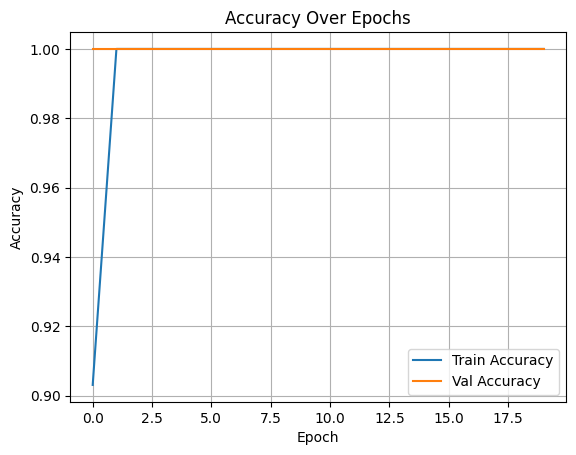

✅ Final Accuracy: 100.00%


In [25]:
# Train the model on CPU
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.grid()
plt.show()

# Evaluate
loss, acc = model.evaluate(X, y, verbose=0)
print(f"✅ Final Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


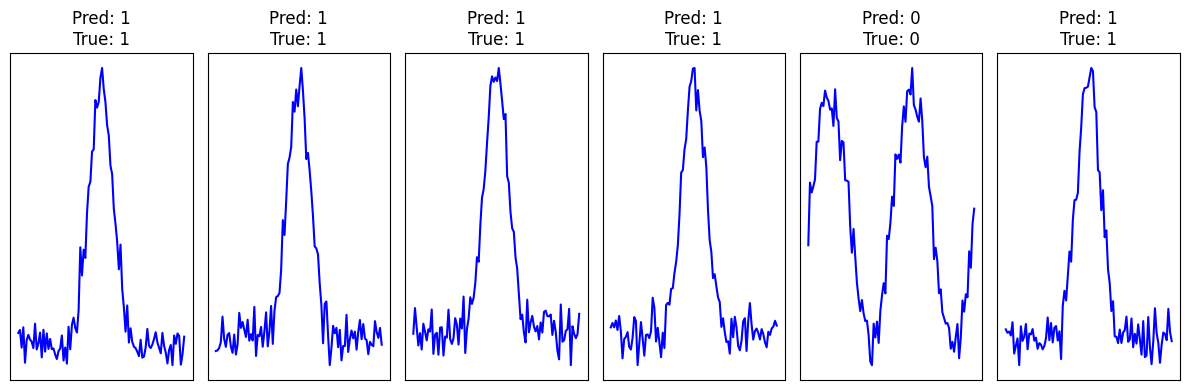

In [26]:
# Predict on some samples
preds = model.predict(X[:6])
pred_labels = np.argmax(preds, axis=1)

# Plot predictions
plt.figure(figsize=(12, 4))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.plot(X[i].squeeze(), color='blue')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {y[i]}")
    plt.xticks([]); plt.yticks([])
    plt.grid()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Classification Report:

               precision    recall  f1-score   support

Variable Star       1.00      1.00      1.00       200
    Supernova       1.00      1.00      1.00       200

     accuracy                           1.00       400
    macro avg       1.00      1.00      1.00       400
 weighted avg       1.00      1.00      1.00       400



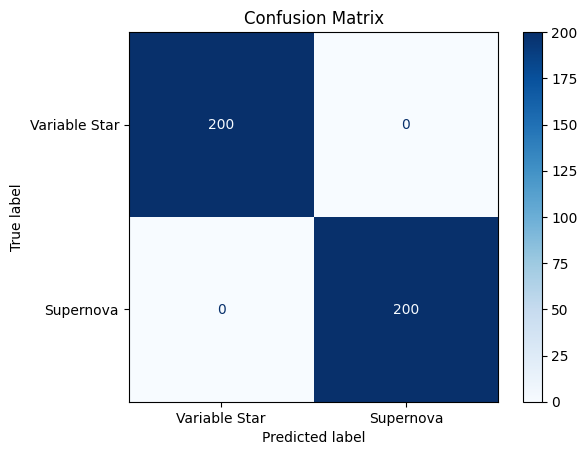

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X), axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y, y_pred, target_names=["Variable Star", "Supernova"]))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Variable Star", "Supernova"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [28]:
model.save("supernova_classifier_1dcnn.h5")
